In [55]:
import uproot
import numpy as np
import ROOT
import awkward as ak

In [56]:
file=uproot.open("/eos/user/j/jreicher/SUEP/WH_private_signals/merged/WHleptonicpythia_leptonic_M125.0_MD1.00_T0.25_HT-1_UL16_NANOAOD.root")

In [57]:
file.keys()

['untagged;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [58]:
tree=file['Events']
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [59]:
events = file['Events'].arrays(['Flag_goodVertices',
                'Flag_globalSuperTightHalo2016Filter',
                'Flag_HBHENoiseFilter',
                'Flag_HBHENoiseIsoFilter',
                'Flag_EcalDeadCellTriggerPrimitiveFilter',
                'Flag_BadPFMuonFilter',
                'Flag_BadPFMuonDzFilter',
                'Flag_eeBadScFilter',
                'HLT_IsoMu27',
                'HLT_IsoMu24',
                'HLT_Mu50'])

In [60]:
file['Events'].num_entries

40000

In [104]:
muonpt=tree['Muon_pt'].array(library="ak")
nwmuon=ak.concatenate(muonpt,axis=0)
print(muonpt)
print(nwmuon)

[[], [36.5], [], [], [34.1], [], [], ... [], [37.6], [], [60.4], [], [64.1]]
[36.5, 34.1, 76.6, 35.5, 46.3, 78.1, 39.8, ... 10.9, 16.7, 11.3, 37.6, 60.4, 64.1]


In [9]:
muonpthist=ROOT.TH1D("muon_pt","Histogram of Muon pT",100,0,200)
for event in muonpt:
    for mu in event:
        muonpthist.Fill(mu)
    

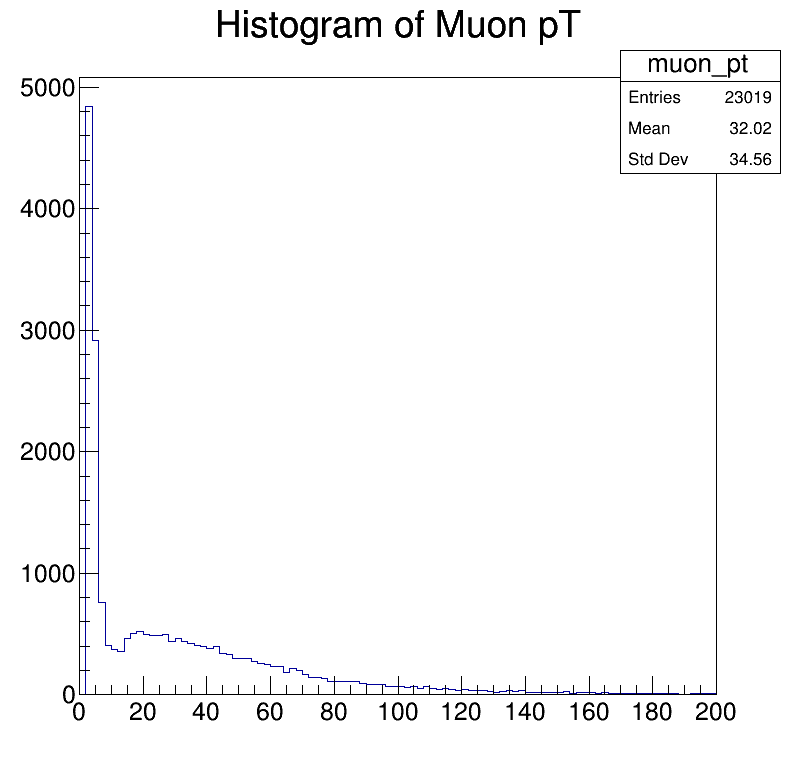

In [10]:
c1 = ROOT.TCanvas("Canvas","",800,800)
c1.Draw()
muonpthist.Draw()


In [61]:
cutAnyFilter = ('Flag_goodVertices'
                'Flag_globalSuperTightHalo2016Filter'
                'Flag_HBHENoiseFilter'
                'Flag_HBHENoiseIsoFilter'
                'Flag_EcalDeadCellTriggerPrimitiveFilter'
                'Flag_BadPFMuonFilter'
                'Flag_BadPFMuonDzFilter'
                'Flag_eeBadScFilter')

In [97]:
def ptcut(evs,ptmin,ptmax):
    # splits events based on pT
    cut = ptmax>ak.any(evs)>ptmin
    cut_ev=evs[cut]
    print(cut_ev)
    return cut_ev

In [98]:
 muonpt=tree['Muon_pt'].array()
# long_mu=ak.flatten(muonpt,axis=1)
# print(long_mu)
# len(long_mu)

In [99]:
 triggerSingleMuon = (
            events.HLT_IsoMu27
            | events.HLT_IsoMu24
            | events.HLT_Mu50
        )
    
cutAnyFilter = (
                (events.Flag_goodVertices)
                & (events.Flag_globalSuperTightHalo2016Filter)
                & (events.Flag_HBHENoiseFilter)
                & (events.Flag_HBHENoiseIsoFilter)
                & (events.Flag_EcalDeadCellTriggerPrimitiveFilter)
                & (events.Flag_BadPFMuonFilter)
                & (events.Flag_BadPFMuonDzFilter)
                & (events.Flag_eeBadScFilter)
            )

In [101]:
def efficiencies(tree,trigger):
    # Define bin size, max and min for the pT
    pt_bin=10
    max_pt=200
    min_pt=0
    # Initialize array for efficiencies
    effs=np.zeros(int(max_pt/pt_bin))
    sig_tmp=tree.arrays(['Muon_pt'])
    signal=sig_tmp.Muon_pt
    tr_data=signal[trigger]
    #print(len(tr_data))
    #signal=ak.concatenate(signal,axis=0)
    #tr_data=ak.concatenate(tr_data,axis=0)
    # Perform pT cuts, fill efficiencies
    for cut in range(20):
        cut_sig=ptcut(signal,cut*pt_bin,cut*pt_bin+pt_bin)
        cut_tr=ptcut(signal,cut*pt_bin,cut*pt_bin+pt_bin)
        #print(len(cut_tr))
        #print(len(cut_sig))
        effs[cut]=len(cut_tr)/len(cut_sig)
    return effs


In [102]:
ttree=file['Events']
efficiencies(ttree,triggerSingleMuon)

[36.5]
[36.5]
[]
[]


ZeroDivisionError: division by zero